# Sentiment

**TODO: Add description**

In [1]:
# add all imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import time

## EDA

In [2]:
df = pd.read_csv('data/original/total.csv', sep=",", error_bad_lines=False, encoding= "unicode_escape")

/tmp/ipykernel_561/533015749.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data/original/total.csv', sep=",", error_bad_lines=False, encoding= "unicode_escape")


In [3]:
# first insight into the data
print("Total number of entries: ", len(df["sentence id"])) # No unique since sentences with different topics may have the same ID
n_positive = df["sentiment"].value_counts()["positive"]
n_negative = df["sentiment"].value_counts()["negative"]
n_neutral = df["sentiment"].value_counts()["neutral"]
print("Total number of positive entries: ", n_positive)
print("Total number of negative entries: ", n_negative)
print("Total number of neutral entries: ", n_neutral)

Total number of entries:  9000
Total number of positive entries:  3000
Total number of negative entries:  3000
Total number of neutral entries:  3000


positive    3000
negative    3000
neutral     3000
Name: sentiment, dtype: int64


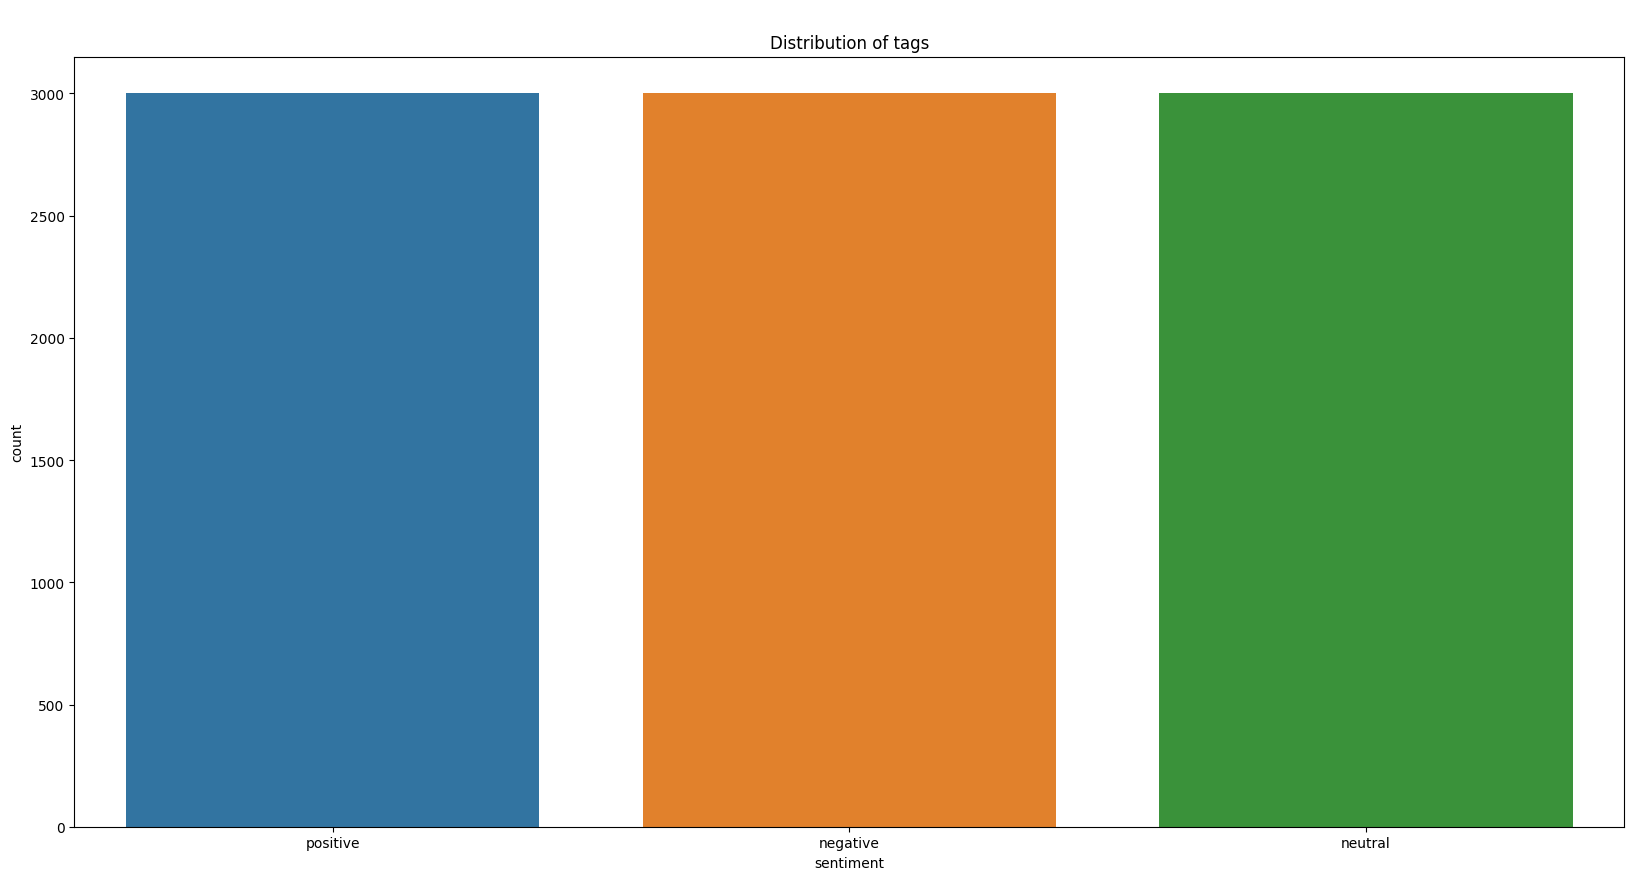

In [4]:
# more insight into the data
print(df["sentiment"].value_counts())
# plot the distribution of the tags
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x="sentiment", data=df)
# add counts and percentages to the plot
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.1, p.get_height()+300))

# set the title of the plot
plt.title("Distribution of tags")
plt.savefig("figures/distribution_of_sentiments_barplot.png")
plt.show()

**Do not run the following two cells if you do not want to waste 10+ minutes**

In [5]:
start_time = time.time()
# avg. sentence count per sentiment
positive_entries = df[df["sentiment"] == "positive"]["text"][::5]
neutral_entries = df[df["sentiment"] == "neutral"]["text"][::5]
negative_entries = df[df["sentiment"] == "negative"]["text"][::5]
# [::5] to make it run in a reasonable time
positive_sentences = sent_tokenize(positive_entries.str.cat(sep=" "))
neutral_sentences = sent_tokenize(neutral_entries.str.cat(sep=" "))
negative_sentences = sent_tokenize(negative_entries.str.cat(sep=" "))
avg_sentence_per_positive = len(positive_sentences)/len(positive_entries)
print("average sentence count in positive texts: {:.3f}", avg_sentence_per_positive)
avg_sentence_per_neutral = len(neutral_sentences)/len(neutral_entries)
print("average sentence count in neutral texts: {:.3f}", avg_sentence_per_neutral)
avg_sentence_per_negative = len(negative_sentences)/len(negative_entries)
print("average sentence count in negative texts: {:.3f}", avg_sentence_per_negative)
print("---sentence %s seconds ---" % (time.time() - start_time))


average sentence count in positive texts: {:.3f} 1.2602645728812796
average sentence count in neutral texts: {:.3f} 1.3954839561600423
average sentence count in negative texts: {:.3f} 1.373028420162506
---sentence 450.102436542511 seconds ---


In [6]:
# avg. word count per sentiment
start_time = time.time()
positive_words = word_tokenize(positive_entries.str.cat(sep=" "))
neutral_words = word_tokenize(neutral_entries.str.cat(sep=" "))
negative_words = word_tokenize(negative_entries.str.cat(sep=" "))
avg_word_per_positive = len(positive_words)/len(positive_entries)
print("average word count in positive texts: {:.3f}", avg_word_per_positive)
avg_word_per_neutral = len(neutral_words)/len(neutral_entries)
print("average word count in neutral texts: {:.3f}", avg_word_per_neutral)
avg_word_per_negative = len(negative_words)/len(negative_entries)
print("average word count in negative texts: {:.3f}", avg_word_per_negative)
print("---word %s seconds ---" % (time.time() - start_time))

average word count in positive texts: {:.3f} 26.39112240995298
average word count in neutral texts: {:.3f} 28.537237554469826
average word count in negative texts: {:.3f} 27.158461708151034
---word 428.89476466178894 seconds ---


**TODO: Maybe run important_features_per_class after training**

## MODEL TRAINING

In [5]:
import pathlib
import sklearn
import numpy
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [6]:
# load the data
data = pd.read_csv('data/original/total.csv', encoding='utf-8')


In [7]:
# initialize sent object, and then turn sent train data into a vector 
sent = CountVectorizer(min_df=2, # If a token appears fewer times than this, across all documents, it will be ignored
                             tokenizer=nltk.word_tokenize, # we use the nltk tokenizer
                             stop_words=stopwords.words('english'))
sent_counts = sent.fit_transform(data['text'])

# initialize tfidf object, and then turn tfidf train data into a vector
tfidf = TfidfTransformer()
sent_tfidf = tfidf.fit_transform(sent_counts)





/home/okanaraz/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [8]:
# split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(sent_tfidf, data['sentiment'], test_size=0.2, random_state=42)

# initialize the classifier
clf = MultinomialNB().fit(X_train, y_train)

# predict the labels on validation dataset
predictions_train = clf.predict(X_train)
predictions_val = clf.predict(X_val)

# find classification report for train and validation data
print("Classification report for train data")
print(classification_report(y_train, predictions_train))
print("Classification report for validation data")
print(classification_report(y_val, predictions_val))






Classification report for train data
              precision    recall  f1-score   support

    negative       0.88      0.90      0.89      2382
     neutral       0.82      0.83      0.82      2413
    positive       0.89      0.86      0.88      2405

    accuracy                           0.86      7200
   macro avg       0.86      0.86      0.86      7200
weighted avg       0.86      0.86      0.86      7200

Classification report for validation data
              precision    recall  f1-score   support

    negative       0.69      0.67      0.68       618
     neutral       0.52      0.56      0.54       587
    positive       0.69      0.66      0.67       595

    accuracy                           0.63      1800
   macro avg       0.63      0.63      0.63      1800
weighted avg       0.63      0.63      0.63      1800



In [9]:
# read test data
test_data = pd.read_csv('data/test/sentiment-topic-final-test.tsv', sep='\t', encoding='utf-8')
test_data
X_test = test_data['text']
y_test = test_data['sentiment']

# transform test data into a vector
test_counts = sent.transform(X_test)
test_tfidf = tfidf.transform(test_counts)

# predict the labels on test dataset
predictions_test = clf.predict(test_tfidf)

# find classification report for test data
print("Classification report for test data")
print(classification_report(y_test, predictions_test))


Classification report for test data
              precision    recall  f1-score   support

    negative       0.50      0.33      0.40         3
     neutral       0.50      0.67      0.57         3
    positive       0.50      0.50      0.50         4

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10

